# FIT5196 Assessment 1
#### Student Name: Swaraj Purohit
#### Student ID: 29286174

Date: 03/10/2018

Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)

Libraries used:
* pandas 0.19.2 (for data frame, included in Anaconda Python 3.6) 
* re 2.2.1 (for regular expression, included in Anaconda Python 3.6) 
* matplotlib (for visualization, included in Anaconda Python 3.6)
* numpy (for using arrays, included in Anaconda Python 3.6)
* datetime (for getting datetime format, included in Anaconda Python 3.6)
* sklearn (for accessing statistical algorithms, included in Anaconda Python 3.6)

note: The cells need to be run in order. Code comments starting with 3 * means that this code permanently alters the dataframe

# Introduction

There are relationships found amongst the features and so the analysis is divided into sections:
* ID
* Origin and Destination Co-ordinates
* Drone Type, Delivery, Departure and Travel times
* Post Type
* Departure Date
* Fare

Syntax, semantic and coverage errors are looked for each column.

Importing dataset and having a preliminary overview of the data:

In [526]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
%matplotlib inline

In [527]:
df = pd.read_csv('29286174.csv')

In [528]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1916644910,1.0,0.0,29.364,6.0,26.0,-37.721629,142.923370,-37.159802,147.755539,431.590,2018-07-27,08:05:23,437.84,15:23:13,103.44
1,ID1737873632,1.0,0.0,22.000,1.0,3.0,-38.768748,145.975063,-37.815917,147.967342,203.825,2018-05-15,07:20:48,210.07,10:50:52,94.17
2,ID1144893592,2.0,0.0,35.219,27.0,10.0,-37.128423,143.298559,-38.060572,145.721902,237.588,2018-02-17,21:09:51,204.86,0:34:42,151.30
3,ID1188085757,3.0,0.0,48.075,17.0,20.0,-36.912743,145.210805,-37.641696,145.061909,82.210,2018-02-26,07:08:33,71.81,8:20:21,151.55
4,ID1657230014,1.0,0.0,39.616,4.0,28.0,-37.177231,148.335859,-37.386122,146.489867,165.144,2018-06-08,23:05:59,171.39,1:57:22,121.23


In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38799 entries, 0 to 38798
Data columns (total 16 columns):
Id                       38774 non-null object
Drone Type               38789 non-null float64
Post Type                38779 non-null float64
Package Weight           38799 non-null float64
Origin Region            38789 non-null float64
Destination Region       38789 non-null float64
Origin Latitude          38799 non-null float64
Origin Longitude         38799 non-null float64
Destination Latitude     38799 non-null float64
Destination Longitude    38799 non-null float64
Journey Distance         38799 non-null float64
Departure Date           38799 non-null object
Departure Time           38799 non-null object
Travel Time              38759 non-null float64
Delivery Time            38799 non-null object
Delivery Fare            38769 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.7+ MB


In [530]:
df.describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
count,38789.000000,38779.000000,38799.000000,38789.000000,38789.000000,38799.000000,38799.000000,38799.000000,38799.000000,38799.000000,38759.000000,38769.000000
mean,1.701281,0.295856,28.703965,20.939235,21.024027,-37.689048,145.395487,-37.695434,145.411717,217.273480,203.884597,146.159559
std,0.783975,0.456432,13.873232,11.835671,11.828664,1.878539,6.837812,1.883131,6.819679,112.825319,105.032669,59.895823
min,1.000000,0.000000,5.002000,1.000000,1.000000,-39.006825,-148.234728,-39.006825,-148.381991,0.523000,6.770000,64.460000
25%,1.000000,0.000000,16.671000,11.000000,11.000000,-38.443206,143.934423,-38.451387,143.957053,130.705500,123.570000,113.960000
50%,1.000000,0.000000,28.619000,21.000000,21.000000,-37.720874,145.706236,-37.724354,145.728823,206.753000,193.390000,140.020000
75%,2.000000,1.000000,40.423500,31.000000,31.000000,-37.040953,147.035667,-37.046032,147.056885,293.365000,272.230000,168.230000
max,3.000000,1.000000,61.991000,41.000000,41.000000,38.843176,148.450738,38.979562,148.450738,545.849000,547.870000,1292.730000


In [531]:
df.shape

(38799, 16)

In [532]:
# We can see that there are nulls in 7 columns.
df.isnull().sum()

Id                       25
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
dtype: int64

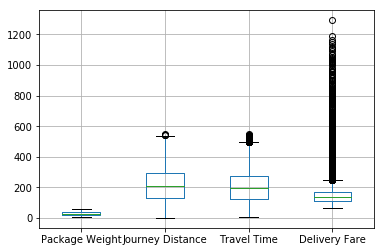

In [533]:
# Several outliers detected in Delivery Fare and Travel Time. The ones in distance could be ignored as they are at the same 
# point. So that would be one distant location. Several more in travel time.
df.boxplot(column = ['Package Weight', 'Journey Distance', 'Travel Time', 'Delivery Fare'])

### Id

Checking if all Ids are unique and if all have correct syntax.

In [534]:
#We can see that entries with same Ids are exact duplicates and there are no nulls in them.
df[df['Id'].isin(df[df.duplicated('Id')]['Id'].tolist())].sort_values('Id')

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
38766,ID1248391493,3.0,0.0,27.185,3.0,29.0,-37.785198,148.103327,-37.005639,144.716144,311.848,2018-07-09,00:46:31,253.10,4:59:36,190.10
15321,ID1248391493,3.0,0.0,27.185,3.0,29.0,-37.785198,148.103327,-37.005639,144.716144,311.848,2018-07-09,00:46:31,253.10,4:59:36,190.10
38745,ID1314759153,1.0,0.0,20.197,8.0,22.0,-37.616966,146.659599,-36.652975,143.807457,274.901,2018-03-10,05:39:41,281.15,10:20:49,121.00
20214,ID1314759153,1.0,0.0,20.197,8.0,22.0,-37.616966,146.659599,-36.652975,143.807457,274.901,2018-03-10,05:39:41,281.15,10:20:49,121.00
30990,ID1355533474,2.0,0.0,9.584,21.0,21.0,-37.428794,143.398281,-37.580148,143.298602,19.009,2018-06-16,17:11:28,22.72,17:34:11,123.03
38742,ID1355533474,2.0,0.0,9.584,21.0,21.0,-37.428794,143.398281,-37.580148,143.298602,19.009,2018-06-16,17:11:28,22.72,17:34:11,123.03
38747,ID1365491190,2.0,0.0,15.406,30.0,9.0,-38.054315,143.716052,-37.789690,144.379280,65.265,2018-01-02,10:37:51,61.26,11:39:06,108.94
20322,ID1365491190,2.0,0.0,15.406,30.0,9.0,-38.054315,143.716052,-37.789690,144.379280,65.265,2018-01-02,10:37:51,61.26,11:39:06,108.94
38790,ID1462364102,1.0,0.0,29.716,29.0,3.0,-36.897060,144.629836,-37.735347,148.087673,320.008,2018-03-17,14:11:32,326.26,19:37:47,118.87
4943,ID1462364102,1.0,0.0,29.716,29.0,3.0,-36.897060,144.629836,-37.735347,148.087673,320.008,2018-03-17,14:11:32,326.26,19:37:47,118.87


In [535]:
# Checking synatx. 38774 rows i.e.38799 -num of nulls (25). Hence, all syntax is fine for id column.
r_id = r'^ID\d{10}$'
df[df.Id.str.contains(r_id) == True].shape


(38774, 16)

In [536]:
#***Dropping the duplicates. Note that one of the duplicates with null Id has also been dropped.
df = df.drop_duplicates()
df.shape

(38765, 16)

In [537]:
# The null values are missing completely at random but contain useful data which has no nulls for the other columns. 
# Hence rows with null Ids are being left as they are. (The line of code below can show this)
#df[df['Id'].isna()]

### Origin and Destination lat, lon and Journey Distance

We check for syntax errors and then check whether all co-ordinates are in Victoria. Then Journey distance is calculated as a function of origin and destination co-ordinates.

In [538]:
# Substitute the four lat and long columns in below code to check that all values are floats.
all(type(x) == float for x in df['Destination Longitude'])

True

Checking if all origin co-ordinates are in Victoria (Rough estimate of Victoria: lat (-34,-40) lon(140,150))

In [539]:
# Code below shows rows which are not in Victoria
df[(df['Origin Latitude'] < -40) | (df['Origin Latitude'] > -34) | (df['Origin Longitude'] < 140) | (df['Origin Longitude'] > 150) ]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
399,ID1406884216,1.0,0.0,45.669,36.0,24.0,36.588728,-145.959404,-38.834390,144.942786,265.523,2018-02-04,17:25:09,271.77,21:56:55,106.86
2452,ID1218285069,3.0,0.0,17.747,37.0,5.0,36.738828,-148.191449,-38.653980,143.869079,436.272,2018-01-10,02:18:56,351.33,8:10:15,207.53
5526,ID1706227360,3.0,0.0,9.086,26.0,34.0,37.098803,-147.648938,-38.522154,143.184228,423.352,2018-04-23,20:02:11,341.13,1:43:18,198.84
6205,ID5800336866,1.0,1.0,40.252,41.0,34.0,38.714329,-144.224998,-38.557694,143.352160,77.873,2018-07-14,05:05:32,84.12,6:29:39,143.58
6532,ID1465626768,1.0,0.0,21.390,12.0,23.0,38.368293,-144.837333,-37.918748,147.347950,225.414,2018-04-21,17:21:28,231.66,21:13:07,102.96
6537,ID1296367929,2.0,0.0,7.168,3.0,35.0,37.908362,-148.234728,-36.565562,143.225660,468.338,2018-01-05,23:21:17,397.16,5:58:26,171.22
10615,ID5542906911,1.0,1.0,12.548,20.0,11.0,37.803167,-145.210735,-36.849339,146.952243,187.178,2018-07-19,19:38:36,193.43,22:52:01,137.21
10637,ID5573935768,2.0,1.0,14.124,19.0,7.0,36.535602,-147.624067,-37.126033,143.977003,331.508,2018-07-21,23:46:00,283.13,4:29:07,196.27
13683,ID5502663418,1.0,1.0,7.040,38.0,30.0,38.021740,-146.335446,-38.004195,143.484026,250.078,2018-04-26,15:30:17,256.33,19:46:36,145.50
14741,ID1820358594,1.0,0.0,48.956,38.0,27.0,38.093204,-146.535343,-36.897282,143.583942,292.672,2018-07-21,14:07:26,298.92,19:06:21,113.91


In [540]:
# Checking if all destination coordinates are in Victoria.
df[(df['Destination Latitude'] < -40) | (df['Destination Latitude'] > -34) | (df['Destination Longitude'] < 140) | (df['Destination Longitude'] > 150) ]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
1462,ID5422498711,1.0,1.0,30.448,22.0,23.0,-36.570216,143.895042,38.022813,-147.397449,349.736,2018-05-03,14:31:41,355.99,20:27:40,155.39
7577,ID1857602774,3.0,0.0,44.530,20.0,29.0,-37.759589,145.217005,36.877367,-144.770052,105.877,2018-07-24,04:50:35,90.50,6:21:05,182.67
8628,ID5509232690,1.0,1.0,15.908,40.0,12.0,-36.591899,146.557500,38.371589,-144.849555,249.006,2018-06-03,07:56:18,255.26,12:11:33,125.69
8641,ID1230881320,3.0,0.0,30.512,24.0,33.0,-38.942088,144.892096,38.120941,-144.024125,118.608,2018-06-16,07:44:16,100.55,9:24:48,161.34
9766,ID1297998625,1.0,0.0,43.539,41.0,41.0,-38.683823,144.462026,38.866643,-144.431879,20.519,2018-06-03,03:49:56,26.77,4:16:42,98.84
10690,ID1526188655,2.0,0.0,37.949,20.0,1.0,-37.803167,145.210735,38.710592,-146.120568,128.561,2018-07-13,09:09:54,114.01,11:03:54,122.60
12707,ID1260319408,1.0,0.0,23.542,8.0,33.0,-37.648434,146.763488,38.241938,-144.169742,237.073,2018-04-28,15:29:03,243.32,19:32:22,105.31
12735,ID1495292317,3.0,0.0,29.238,34.0,9.0,-38.517947,143.416932,37.744303,-144.539045,130.652,2018-02-21,07:37:41,110.05,9:27:43,149.84
14762,ID1184581419,1.0,0.0,11.916,6.0,4.0,-37.751020,143.003778,37.111112,-148.379333,480.413,2018-01-24,00:04:38,486.66,8:11:17,143.17
16792,ID1891763553,1.0,0.0,36.436,3.0,40.0,-37.999230,148.089806,36.522842,-146.348818,225.382,2018-01-05,01:51:49,231.63,5:43:26,119.88


In [541]:
# We can see that the minus sign is placed in longitude instead of latitude. Fixing this by creating functions

def lat_fixer(x):
    if x > 0: #Since we know that error is due to misplaced minus sign
        return x*(-1)
    else: return x

def lon_fixer(x):
    if x < 0:
        return x*(-1)
    else: return x


In [542]:
# *** Fixing lat and lon errors using above function. (Semantic error)
df['Origin Latitude'] = df['Origin Latitude'].apply(lambda x: lat_fixer(x))
df['Origin Longitude'] = df['Origin Longitude'].apply(lambda x: lon_fixer(x))
df['Destination Latitude'] = df['Destination Latitude'].apply(lambda x: lat_fixer(x))
df['Destination Longitude'] = df['Destination Longitude'].apply(lambda x: lon_fixer(x))

In [543]:
# Function to find distance between two sets of lat, lon. Source: https://gis.stackexchange.com/a/56589/15183 (modified)
import math

def haversine(row):
    
    lat1 = row['Origin Latitude']
    lon1 = row['Origin Longitude']
    lat2 = row['Destination Latitude']
    lon2 = row['Destination Longitude']
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    km = 6378 * c
    return round(km,3)

In [544]:
#*** Using above function to fix journey distance column. (semantic error)
df['Journey Distance'] = df.apply(lambda x: haversine(x), axis = 1)

### Drone Type, Departure Time, Delivery Time and Travel Time.

Firstly we check for syntax error and make sure that travel time is difference beteen delivery and departure time. Several outliers have been detected in travel time and need to impute nulls.

In [545]:
df.head(20)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1916644910,1.0,0.0,29.364,6.0,26.0,-37.721629,142.923370,-37.159802,147.755539,431.590,2018-07-27,08:05:23,437.84,15:23:13,103.44
1,ID1737873632,1.0,0.0,22.000,1.0,3.0,-38.768748,145.975063,-37.815917,147.967342,203.825,2018-05-15,07:20:48,210.07,10:50:52,94.17
2,ID1144893592,2.0,0.0,35.219,27.0,10.0,-37.128423,143.298559,-38.060572,145.721902,237.588,2018-02-17,21:09:51,204.86,0:34:42,151.30
3,ID1188085757,3.0,0.0,48.075,17.0,20.0,-36.912743,145.210805,-37.641696,145.061909,82.210,2018-02-26,07:08:33,71.81,8:20:21,151.55
4,ID1657230014,1.0,0.0,39.616,4.0,28.0,-37.177231,148.335859,-37.386122,146.489867,165.144,2018-06-08,23:05:59,171.39,1:57:22,121.23
5,ID5802598552,1.0,1.0,25.941,18.0,30.0,-38.704207,146.663479,-37.936667,143.712068,271.536,2018-05-21,22:14:24,277.79,2:52:11,160.24
6,ID1636678468,3.0,0.0,17.302,11.0,13.0,-36.901230,146.863949,-38.564854,147.945398,208.226,2018-04-15,19:56:40,171.30,22:47:58,167.55
7,ID5854114806,1.0,1.0,40.602,16.0,7.0,-37.006624,145.945497,-37.152664,143.788522,192.242,2018-02-27,23:05:09,198.49,2:23:38,159.89
8,ID5189871376,1.0,1.0,27.195,1.0,23.0,-38.741554,145.884903,-37.903352,147.073159,139.550,2018-03-12,23:49:47,145.80,2:15:35,146.04
9,ID5135913933,2.0,1.0,29.535,4.0,35.0,-37.275605,148.255956,-36.704389,143.115690,461.381,2018-01-27,12:47:27,391.36,19:18:48,198.79


In [546]:
# Checking for 24hr time syntax. No rows are eliminated therfore, syntax is fine.
r_time = r'^([0-9]|0[0-9]|1[0-9]|2[0-3]):[0-5][0-9]:[0-5][0-9]$'
print(df[df['Departure Time'].str.contains(r_time)].shape)
print(df[df['Delivery Time'].str.contains(r_time)].shape)

(38765, 16)
(38765, 16)


C:\Users\Swaraj Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Swaraj Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


In [547]:
# Function to impute missing values of travel time using the difference between delivery and departure time.
import datetime
def travel_time_imputer(row):
    a = datetime.datetime.strptime(row['Delivery Time'], "%H:%M:%S")
    b = datetime.datetime.strptime(row['Departure Time'], "%H:%M:%S")
    c = a-b
    return round(c.seconds/60, 2)

In [548]:
# *** Imputing travel time nulls using above function and updating mean speed column. These values maybe wrong 
# but will be fixed in proceeding steps(coverage error)
df['Travel Time'][df['Travel Time'].isnull()] = df.apply(lambda x: travel_time_imputer(x), axis = 1)

C:\Users\Swaraj Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Using the formula t = 10 + (d-beta/12)/z where:
* t is travel time
* d is journey distance
* beta is sum of take of and landing speeds
* z is onroute speed

For each drone type:
* First find z for each drone type.
* Use it to calculate beta

Use the values calculated above and journey distance to calculate the travel time for each row for each drone type.


In [549]:
# Splitting into dataframes based on dronetypes.
df1 = df[df['Travel Time'].isna() == False]
d = df1.groupby('Drone Type')
d1 = d.get_group(1.0).iloc[:,[1,10,13]].reset_index(drop = True)
d2 = d.get_group(2.0).iloc[:,[1,10,13]].reset_index(drop = True)
d3 = d.get_group(3.0).iloc[:,[1,10,13]].reset_index(drop = True)
print(d1.shape)
print(d2.shape)
print(d3.shape)
d3.head()

(19430, 3)
(11475, 3)
(7850, 3)


,Drone Type,Journey Distance,Travel Time
0,3.0,82.210,71.81
1,3.0,208.226,171.30
2,3.0,246.196,201.27
3,3.0,87.940,76.33
4,3.0,91.460,79.11


In [550]:
# Find z i.e. on route speed z = 60(dist1-dist2)/(t1-t2)
# Taking average of solutions of each equation.
z1 = [] 
for i in range(0,19430,2):
    z1.append((d1.iloc[i,1]-d1.iloc[i+1,1])*60/(d1.iloc[i,2]-d1.iloc[i+1,2]))
z2 = [] 
for i in range(0,11474,2):
    z2.append((d2.iloc[i,1]-d2.iloc[i+1,1])*60/(d2.iloc[i,2]-d2.iloc[i+1,2]))
z3 = [] 
for i in range(0,7850,2):
    z3.append((d3.iloc[i,1]-d3.iloc[i+1,1])*60/(d3.iloc[i,2]-d3.iloc[i+1,2]))
    
speed_z1 = sum(z1)/len(z1)
speed_z2 = sum(z2)/len(z2)
speed_z3 = sum(z3)/len(z3)

In [551]:
# Find beta i.e. takeoff + landing speeds 
time = d1['Travel Time'].mean()/60
dist = d1['Journey Distance'].mean()
beta1 = 12*(dist-(time-(1/6))*speed_z1)

time = d2['Travel Time'].mean()/60
dist = d2['Journey Distance'].mean()
beta2 = 12*(dist-(time-(1/6))*speed_z2)

time = d3['Travel Time'].mean()/60
dist = d3['Journey Distance'].mean()
beta3 = 12*(dist-(time-(1/6))*speed_z3)

In [552]:
# Function to calculate time based on drone speeds
def time_calculator(row):
    if row['Drone Type'] == 1.0:
        return ((row['Journey Distance'] - (beta1/12))/speed_z1)*60 + 10
    if row['Drone Type'] == 2.0:
        return ((row['Journey Distance'] - (beta2/12))/speed_z2)*60 + 10
    if row['Drone Type'] == 3.0:
        return ((row['Journey Distance'] - (beta3/12))/speed_z3)*60 + 10
# Create new column to store calculated travel times
df['Calc time'] = df.apply(lambda x: time_calculator(x), axis =1)

In [553]:
# We can see travel time errors. margin of error = 1 min. 
df[(df['Travel Time']-df['Calc time'] > 1) | (df['Travel Time']-df['Calc time'] < -1)]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Calc time
781,ID1520298122,2.0,0.0,41.757,20.0,8.0,-37.778731,145.167903,-37.792500,146.887835,151.316,2018-03-06,06:07:03,126.37,8:13:25,151.82,132.971849
810,ID1931040655,2.0,0.0,31.849,3.0,9.0,-37.749669,147.985943,-37.787425,144.424598,313.390,2018-01-28,18:46:18,254.32,23:00:37,181.64,268.176500
2702,ID5169048900,2.0,1.0,26.003,27.0,40.0,-37.160124,143.508821,-36.630190,146.583741,280.012,2018-02-04,08:20:10,286.26,13:06:25,130.22,240.332054
2749,ID1312465139,1.0,0.0,45.769,25.0,32.0,-37.570801,145.848425,-38.934413,148.203204,255.745,2018-03-24,19:37:48,220.00,23:17:48,143.26,261.895633
2766,ID5282794863,2.0,1.0,18.084,37.0,34.0,-36.605403,147.971510,-38.504580,143.400142,455.375,2018-03-05,17:26:00,461.63,1:07:37,164.32,386.622596
2834,ID5886423346,1.0,1.0,59.393,41.0,24.0,-38.714175,144.557084,-38.935260,145.142600,56.428,2018-03-20,12:43:23,51.46,13:34:50,310.76,62.903822
6838,ID5506964874,2.0,1.0,38.464,23.0,22.0,-37.806238,147.338219,-36.601704,143.901404,332.884,2018-03-15,18:46:16,339.13,0:25:23,152.41,284.438698
6866,ID1498407640,1.0,0.0,6.694,3.0,36.0,-37.780918,148.069955,-36.564051,145.752288,246.179,2018-02-14,19:36:38,201.26,22:57:53,175.62,252.345240
8832,ID1834730853,2.0,0.0,42.254,23.0,27.0,-37.998581,147.384955,-37.092590,143.275980,376.382,2018-06-05,23:45:53,382.63,6:08:30,130.95,320.725407
8928,ID1407909264,2.0,0.0,6.302,9.0,7.0,-37.652868,144.510633,-37.109645,143.971137,77.031,2018-07-21,22:10:37,83.28,23:33:53,107.34,71.002146


In [554]:
# Create columns with travel time if drone type is 1,2 or 3.
df['asType1.0'] = df.apply(lambda x: ((x['Journey Distance'] - (beta1/12))/speed_z1)*60 + 10, axis =1 )
df['asType2.0'] = df.apply(lambda x: ((x['Journey Distance'] - (beta2/12))/speed_z2)*60 + 10, axis =1 )
df['asType3.0'] = df.apply(lambda x: ((x['Journey Distance'] - (beta3/12))/speed_z3)*60 + 10, axis =1 )
df.head()      

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Calc time,asType1.0,asType2.0,asType3.0
0,ID1916644910,1.0,0.0,29.364,6.0,26.0,-37.721629,142.923370,-37.159802,147.755539,431.590,2018-07-27,08:05:23,437.84,15:23:13,103.44,437.453738,437.453738,366.780779,347.614696
1,ID1737873632,1.0,0.0,22.000,1.0,3.0,-38.768748,145.975063,-37.815917,147.967342,203.825,2018-05-15,07:20:48,210.07,10:50:52,94.17,210.060341,210.060341,176.775673,167.823467
2,ID1144893592,2.0,0.0,35.219,27.0,10.0,-37.128423,143.298559,-38.060572,145.721902,237.588,2018-02-17,21:09:51,204.86,0:34:42,151.30,204.941293,243.768256,204.941293,194.475022
3,ID1188085757,3.0,0.0,48.075,17.0,20.0,-36.912743,145.210805,-37.641696,145.061909,82.210,2018-02-26,07:08:33,71.81,8:20:21,151.55,71.824036,88.643758,75.322549,71.824036
4,ID1657230014,1.0,0.0,39.616,4.0,28.0,-37.177231,148.335859,-37.386122,146.489867,165.144,2018-06-08,23:05:59,171.39,1:57:22,121.23,171.442450,171.442450,144.507381,137.289783


In [555]:
# Creating function to fix drone type based on travel time.
def dronetype_fixer(row):
    if -1 < row['Travel Time']-row['asType1.0'] < 1:
        return 1.0
    if -1 < row['Travel Time']-row['asType2.0'] < 1:
        return 2.0
    if -1 < row['Travel Time']-row['asType3.0'] < 1:
        return 3.0
    else:
        return row['Drone Type']
# Applying the function to fix drone type column (semantic, coverage error)
df['Drone Type'] = df.apply(lambda x: dronetype_fixer(x), axis =1)

In [556]:
# We can see that above function has also imputed null values of drone type.
df.isna().sum()

Id                       24
Drone Type                0
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time               0
Delivery Time             0
Delivery Fare            30
Calc time                10
asType1.0                 0
asType2.0                 0
asType3.0                 0
dtype: int64

In [557]:
# *REdo calculated time since drone types now changed
df['Calc time'] = df.apply(lambda x: time_calculator(x), axis =1)

In [558]:
# All errors removed now.
df[(df['Travel Time']-df['Calc time'] > 1) | (df['Travel Time']-df['Calc time'] < -1)]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Calc time,asType1.0,asType2.0,asType3.0


In [559]:
# Dropping columns which were added 
df.drop(columns = ['asType1.0', 'asType2.0', 'asType3.0', 'Calc time'], inplace = True)

In [560]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1916644910,1.0,0.0,29.364,6.0,26.0,-37.721629,142.923370,-37.159802,147.755539,431.590,2018-07-27,08:05:23,437.84,15:23:13,103.44
1,ID1737873632,1.0,0.0,22.000,1.0,3.0,-38.768748,145.975063,-37.815917,147.967342,203.825,2018-05-15,07:20:48,210.07,10:50:52,94.17
2,ID1144893592,2.0,0.0,35.219,27.0,10.0,-37.128423,143.298559,-38.060572,145.721902,237.588,2018-02-17,21:09:51,204.86,0:34:42,151.30
3,ID1188085757,3.0,0.0,48.075,17.0,20.0,-36.912743,145.210805,-37.641696,145.061909,82.210,2018-02-26,07:08:33,71.81,8:20:21,151.55
4,ID1657230014,1.0,0.0,39.616,4.0,28.0,-37.177231,148.335859,-37.386122,146.489867,165.144,2018-06-08,23:05:59,171.39,1:57:22,121.23


In [561]:
# Creating column which classifies departure time 
import datetime
def dep_categorizer(x):
    time = datetime.datetime.strptime(x, "%H:%M:%S")
    if datetime.datetime.strptime('06:00:00', "%H:%M:%S") < time < datetime.datetime.strptime('11:59:59', "%H:%M:%S"):
        return 'day'
    if datetime.datetime.strptime('12:00:00', "%H:%M:%S") < time < datetime.datetime.strptime('20:59:59', "%H:%M:%S"):
        return 'afternoon'
    else:
        return 'night'
df['Dep Type'] = df['Departure Time'].apply(lambda x: dep_categorizer(x))

In [562]:
# *** Function to fix delivery times using sum of delivery time and travel time (semantic error)
def departure_time_fixer(row):
    a = datetime.datetime.strptime(row['Departure Time'], "%H:%M:%S")
    b = a + datetime.timedelta(seconds=row['Travel Time']*60//1)
    return str(b)[11:] 


df['Delivery Time'] = df.apply(lambda x: departure_time_fixer(x), axis= 1)


In [563]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Dep Type
0,ID1916644910,1.0,0.0,29.364,6.0,26.0,-37.721629,142.923370,-37.159802,147.755539,431.590,2018-07-27,08:05:23,437.84,15:23:13,103.44,day
1,ID1737873632,1.0,0.0,22.000,1.0,3.0,-38.768748,145.975063,-37.815917,147.967342,203.825,2018-05-15,07:20:48,210.07,10:50:52,94.17,day
2,ID1144893592,2.0,0.0,35.219,27.0,10.0,-37.128423,143.298559,-38.060572,145.721902,237.588,2018-02-17,21:09:51,204.86,00:34:42,151.30,night
3,ID1188085757,3.0,0.0,48.075,17.0,20.0,-36.912743,145.210805,-37.641696,145.061909,82.210,2018-02-26,07:08:33,71.81,08:20:21,151.55,day
4,ID1657230014,1.0,0.0,39.616,4.0,28.0,-37.177231,148.335859,-37.386122,146.489867,165.144,2018-06-08,23:05:59,171.39,01:57:22,121.23,night


### Origin and Destination region.

Firstly we check for syntax errors and then create a classifier to impute the missing values

In [564]:
# We can run this code for origin and destination region to confirm all values are floats.
all(type(x) == float for x in df['Destination Region'])

True

In [565]:
# Creating a random forest classifier to determine origin region based on origin lat and origin lon. This should be a good 
# classifier beacuse region code is based on which section of lat and long the data point lies in.

df1 = df[df['Origin Region'].isna() == False]
X = df1.iloc[:,[6,7]].values
y = df1.iloc[:,4].values

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
origin_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
origin_classifier.fit(X_train, y_train)

y_pred = origin_classifier.predict(X_test)

# The confusion matrix shows that the classifier is good(100% result on test set).
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[188   0   0 ...   0   0   0]
 [  0 198   0 ...   0   0   0]
 [  0   0 172 ...   0   0   0]
 ...
 [  0   0   0 ... 189   0   0]
 [  0   0   0 ...   0 185   0]
 [  0   0   0 ...   0   0 194]]


We expect the classifier to be 100% accurate since the region number depends on which range of lat and lon the coordinates fall into. This code shows that there are rows where the origin region is not correct. For instance we can see that for row 2315,the longitude should be around 146 not 143 if origin region is supposed to be 18. The next 3 blocks of code after this are used to acertain this and see that the classifier gives right value as well.

In [566]:
# Printing indices where values dont match
a= origin_classifier.predict(df.iloc[:,[6,7]]) 
b =  df['Origin Region'].values
c = a-b  
for i in range(len(c)):
    if c[i] != 0:
        print(i)

35
36
1481
2315
4123
6178
7435
8475
10546
11992
12325
12569
14635
15024
16677
24824
26025
26896
28716
29325
30995
33797
35093
37140


In [567]:
a[37140]

23.0

In [568]:
df[df['Origin Region'] == 23]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Dep Type
62,ID1569929273,1.0,0.0,46.797,23.0,25.0,-37.897975,147.256973,-37.484652,145.796839,136.599,2018-06-22,12:06:13,142.85,14:29:04,102.51,afternoon
66,ID1266662310,1.0,0.0,46.747,23.0,7.0,-37.866627,147.129394,-37.156332,144.061208,282.208,2018-01-08,10:05:58,288.46,14:54:25,95.02,day
83,ID5281191115,1.0,1.0,43.290,23.0,30.0,-37.942633,147.072479,-38.042563,143.540082,310.071,2018-03-26,10:21:26,316.32,15:37:45,139.40,day
124,ID5382475081,3.0,1.0,38.318,23.0,3.0,-37.864618,147.289200,-37.978168,148.116520,73.741,2018-04-10,18:10:28,65.12,19:15:35,201.07,afternoon
151,ID5354843313,1.0,1.0,16.880,23.0,12.0,-37.938358,147.328668,-38.495222,144.928045,218.908,2018-01-13,22:57:19,225.16,02:42:28,158.06,night
162,ID1686999780,2.0,0.0,44.134,23.0,23.0,-38.004566,147.135307,-38.022936,147.434569,26.326,2018-04-13,12:18:46,28.81,12:47:34,121.95,afternoon
165,ID1844839851,2.0,0.0,42.401,23.0,16.0,-37.836308,147.347744,-37.093543,145.828365,157.661,2018-07-14,05:33:31,138.26,07:51:46,150.20,night
219,ID5628944499,3.0,1.0,34.060,23.0,10.0,-37.802159,147.222269,-38.171600,145.738015,136.558,2018-03-17,12:46:24,114.72,14:41:07,207.29,afternoon
272,ID1597327306,3.0,0.0,42.585,23.0,20.0,-37.963905,147.336462,-37.750227,145.276853,182.571,2018-01-08,05:19:14,151.04,07:50:16,187.15,night
282,ID1401380424,1.0,0.0,43.288,23.0,10.0,-38.009881,147.321692,-38.008147,145.708516,141.487,2018-04-05,13:48:10,147.74,16:15:54,94.36,afternoon


In [569]:
df.loc[37140,:]

Id                       ID1780311964
Drone Type                          1
Post Type                           0
Package Weight                 23.553
Origin Region                      11
Destination Region                 25
Origin Latitude                -37.85
Origin Longitude              147.198
Destination Latitude         -37.5388
Destination Longitude         145.879
Journey Distance              121.226
Departure Date             2018-04-24
Departure Time               08:13:49
Travel Time                    127.48
Delivery Time                10:21:17
Delivery Fare                   86.34
Dep Type                          day
Name: 37140, dtype: object

In [570]:
#*** Replacing origin region column with values predicted by the classifier. (semantic and coverage error)
df['Origin Region'] = origin_classifier.predict(df.iloc[:,[6,7]])

In [571]:
# Doing the same for destination region

df1 = df[df['Destination Region'].isna() == False]
X = df1.iloc[:,[8,9]].values
y = df1.iloc[:,5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

destination_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
destination_classifier.fit(X_train, y_train)

y_pred = destination_classifier.predict(X_test)

# The confusion matrix shows that the classifier is good
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[167   0   0 ...   0   0   0]
 [  0 184   0 ...   0   0   0]
 [  0   0 172 ...   0   0   0]
 ...
 [  0   0   0 ... 205   0   0]
 [  0   0   0 ...   0 171   0]
 [  0   0   0 ...   0   0 183]]


In [572]:
#*** Replacing the destination region column with those predicted by the classifier. (semantic and coverage error)
df['Destination Region'] = destination_classifier.predict(df.iloc[:,[8,9]])

### Post Type
We check for syntax errors and then try to impute nulls.

In [573]:
df.head(20)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Dep Type
0,ID1916644910,1.0,0.0,29.364,6.0,26.0,-37.721629,142.923370,-37.159802,147.755539,431.590,2018-07-27,08:05:23,437.84,15:23:13,103.44,day
1,ID1737873632,1.0,0.0,22.000,1.0,3.0,-38.768748,145.975063,-37.815917,147.967342,203.825,2018-05-15,07:20:48,210.07,10:50:52,94.17,day
2,ID1144893592,2.0,0.0,35.219,27.0,10.0,-37.128423,143.298559,-38.060572,145.721902,237.588,2018-02-17,21:09:51,204.86,00:34:42,151.30,night
3,ID1188085757,3.0,0.0,48.075,17.0,20.0,-36.912743,145.210805,-37.641696,145.061909,82.210,2018-02-26,07:08:33,71.81,08:20:21,151.55,day
4,ID1657230014,1.0,0.0,39.616,4.0,28.0,-37.177231,148.335859,-37.386122,146.489867,165.144,2018-06-08,23:05:59,171.39,01:57:22,121.23,night
5,ID5802598552,1.0,1.0,25.941,18.0,30.0,-38.704207,146.663479,-37.936667,143.712068,271.536,2018-05-21,22:14:24,277.79,02:52:11,160.24,night
6,ID1636678468,3.0,0.0,17.302,11.0,13.0,-36.901230,146.863949,-38.564854,147.945398,208.226,2018-04-15,19:56:40,171.30,22:47:58,167.55,afternoon
7,ID5854114806,1.0,1.0,40.602,16.0,7.0,-37.006624,145.945497,-37.152664,143.788522,192.242,2018-02-27,23:05:09,198.49,02:23:38,159.89,night
8,ID5189871376,1.0,1.0,27.195,1.0,23.0,-38.741554,145.884903,-37.903352,147.073159,139.550,2018-03-12,23:49:47,145.80,02:15:35,146.04,night
9,ID5135913933,2.0,1.0,29.535,4.0,35.0,-37.275605,148.255956,-36.704389,143.115690,461.381,2018-01-27,12:47:27,391.36,19:18:48,198.79,afternoon


In [574]:
# The code below verifies that all values for post type are either 1.0, 0.0 or null.
df['Post Type'].unique()

array([ 0.,  1., nan])

In [575]:
df.head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Dep Type
0,ID1916644910,1.0,0.0,29.364,6.0,26.0,-37.721629,142.923370,-37.159802,147.755539,431.590,2018-07-27,08:05:23,437.84,15:23:13,103.44,day
1,ID1737873632,1.0,0.0,22.000,1.0,3.0,-38.768748,145.975063,-37.815917,147.967342,203.825,2018-05-15,07:20:48,210.07,10:50:52,94.17,day
2,ID1144893592,2.0,0.0,35.219,27.0,10.0,-37.128423,143.298559,-38.060572,145.721902,237.588,2018-02-17,21:09:51,204.86,00:34:42,151.30,night
3,ID1188085757,3.0,0.0,48.075,17.0,20.0,-36.912743,145.210805,-37.641696,145.061909,82.210,2018-02-26,07:08:33,71.81,08:20:21,151.55,day
4,ID1657230014,1.0,0.0,39.616,4.0,28.0,-37.177231,148.335859,-37.386122,146.489867,165.144,2018-06-08,23:05:59,171.39,01:57:22,121.23,night
5,ID5802598552,1.0,1.0,25.941,18.0,30.0,-38.704207,146.663479,-37.936667,143.712068,271.536,2018-05-21,22:14:24,277.79,02:52:11,160.24,night
6,ID1636678468,3.0,0.0,17.302,11.0,13.0,-36.901230,146.863949,-38.564854,147.945398,208.226,2018-04-15,19:56:40,171.30,22:47:58,167.55,afternoon
7,ID5854114806,1.0,1.0,40.602,16.0,7.0,-37.006624,145.945497,-37.152664,143.788522,192.242,2018-02-27,23:05:09,198.49,02:23:38,159.89,night
8,ID5189871376,1.0,1.0,27.195,1.0,23.0,-38.741554,145.884903,-37.903352,147.073159,139.550,2018-03-12,23:49:47,145.80,02:15:35,146.04,night
9,ID5135913933,2.0,1.0,29.535,4.0,35.0,-37.275605,148.255956,-36.704389,143.115690,461.381,2018-01-27,12:47:27,391.36,19:18:48,198.79,afternoon


Post Type has bad correlation with other featuress. Observation shows that it is likely the post type is dependant on the ID. We can see that if the Id number begins with 1
the type is 0.0 and if it begins with 5 the type is 1.0. The parameters in the code below can be changed to prove this.
We also notice that there are a few rows where there is an error i.e. Id beginning with 1 has type 1.0.

In [576]:
# Showing rows which show errors.
df['temp Id'] = df['Id'].apply(lambda x: str(x)[2])
df[(df['temp Id'] == '1')&(df['Post Type'] == 1.0)]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Dep Type,temp Id
4538,ID1493081760,2.0,1.0,41.439,9.0,8.0,-37.810031,144.246757,-37.558927,146.768980,223.940,2018-03-03,05:51:26,193.49,09:04:55,195.72,night,1
10803,ID1300337184,1.0,1.0,8.116,3.0,41.0,-37.824501,148.236073,-38.763858,144.311067,358.466,2018-07-10,17:03:29,364.72,23:08:12,149.62,afternoon,1
12846,ID1400080241,1.0,1.0,26.235,37.0,37.0,-36.714011,148.055625,-36.575766,148.089197,15.678,2018-02-19,23:26:06,21.93,23:48:01,135.68,night,1
16960,ID1825599646,3.0,1.0,16.394,30.0,37.0,-37.862880,143.741970,-36.635482,148.231014,420.529,2018-05-06,12:42:02,338.90,18:20:56,228.27,afternoon,1
18986,ID1356618036,2.0,1.0,36.093,26.0,6.0,-37.114937,147.730049,-37.680208,142.955813,426.823,2018-05-27,13:05:06,362.56,19:07:39,187.90,afternoon,1
19038,ID1871492210,1.0,1.0,12.454,37.0,37.0,-36.644408,148.123727,-36.682937,148.075585,6.072,2018-02-11,06:32:05,11.94,06:44:01,141.35,day,1
24500,ID1908534549,1.0,1.0,23.450,30.0,13.0,-37.871961,143.615464,-38.487941,147.969806,387.101,2018-03-21,07:59:45,393.35,14:33:06,137.23,day,1
25176,ID1811586045,2.0,1.0,18.857,27.0,21.0,-36.995302,143.400161,-37.591579,143.540855,67.535,2018-02-20,02:28:44,63.15,03:31:53,182.77,night,1
28321,ID1958341705,1.0,1.0,51.995,21.0,8.0,-37.571706,143.356918,-37.647354,146.968948,318.615,2018-06-09,12:49:59,324.87,18:14:51,152.63,afternoon,1
37472,ID1291916985,1.0,1.0,37.726,3.0,32.0,-37.836208,148.250881,-38.982477,148.300286,127.672,2018-05-19,00:31:07,133.92,02:45:02,156.94,night,1


In [577]:
# confirms that no row has both Id and post type as a null
df[(df['Id'].isna())&(df['Post Type'].isna())]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Dep Type,temp Id


In [578]:
# Creating function to fix the post type based on the ID. Imputation is also done when this is applied to the column.

def post_fixer(row):
    if row['temp Id'] == '1':
        return 0.0
    if row['temp Id'] == '5':
        return 1.0
    else: return row['Post Type']
    
#***Fixing and imputing Post Type column. (semantic and coverage error)
df['Post Type'] = df.apply(lambda x: post_fixer(x), axis = 1)
# Dropping temp Id
df.drop(columns= ['temp Id'], inplace =True)

### Departure Date

Checking for date syntax.


In [579]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Dep Type
0,ID1916644910,1.0,0.0,29.364,6.0,26.0,-37.721629,142.923370,-37.159802,147.755539,431.590,2018-07-27,08:05:23,437.84,15:23:13,103.44,day
1,ID1737873632,1.0,0.0,22.000,1.0,3.0,-38.768748,145.975063,-37.815917,147.967342,203.825,2018-05-15,07:20:48,210.07,10:50:52,94.17,day
2,ID1144893592,2.0,0.0,35.219,27.0,10.0,-37.128423,143.298559,-38.060572,145.721902,237.588,2018-02-17,21:09:51,204.86,00:34:42,151.30,night
3,ID1188085757,3.0,0.0,48.075,17.0,20.0,-36.912743,145.210805,-37.641696,145.061909,82.210,2018-02-26,07:08:33,71.81,08:20:21,151.55,day
4,ID1657230014,1.0,0.0,39.616,4.0,28.0,-37.177231,148.335859,-37.386122,146.489867,165.144,2018-06-08,23:05:59,171.39,01:57:22,121.23,night


In [580]:
# Creating regex to check for date syntax (yyyy/mm/dd)
r_date = r'''(?x)^
        # Year
       ((?:[0-9]{2})?[0-9]{2})[/-]
    
        (?:
        # February (28 days since data is for only 2018)
        (0?2)[/-](1?[0-9]|2?[0-8]|0?[1-9])
        # 30-day months
        |(0?[469]|11)[/-](30|[12][0-9]|0?[1-9])
        # 31-day months
        |(0?[13578]|1[02])[/-](3[01]|[12][0-9]|0?[1-9])
        $) 

'''

In [581]:
# Get all entries with invalid date syntax. Observation says that the mistake is that date was entered in place of month
# and viceversa. This is probably true because the max month would be seven which is believable since max right now is seven.  
df[df['Departure Date'].str.contains(r_date) == False]

C:\Users\Swaraj Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Dep Type
894,ID5734420872,1.0,1.0,13.413,28.0,40.0,-37.523094,146.426539,-36.675876,146.626619,95.968,2018-15-06,09:31:59,102.22,11:14:12,112.30,day
1057,ID5766671573,1.0,1.0,38.185,8.0,19.0,-37.599018,146.647676,-36.554778,147.349562,131.900,2018-13-06,22:23:42,138.15,00:41:51,151.70,night
1181,ID1859842402,1.0,0.0,34.819,15.0,17.0,-38.583424,147.074895,-37.003253,145.250658,238.089,2018-16-04,08:02:17,244.34,12:06:37,93.21,day
1213,ID5329606323,1.0,1.0,5.825,41.0,39.0,-38.812803,144.513746,-38.902719,147.646607,271.738,2018-23-01,07:36:54,277.99,12:14:53,129.21,day
1271,ID1149120639,2.0,0.0,21.702,9.0,31.0,-37.845917,144.310250,-38.956943,143.281856,152.786,2018-27-06,10:01:52,134.20,12:16:03,119.23,day
2369,ID1460262215,1.0,0.0,44.857,19.0,35.0,-36.510453,147.505007,-36.660524,142.987622,404.090,2018-13-06,13:40:44,410.34,20:31:04,122.37,afternoon
2938,ID5548817839,3.0,1.0,6.357,32.0,3.0,-38.866309,148.311581,-37.814839,148.190651,117.522,2018-27-07,21:56:11,99.69,23:35:52,217.93,night
3909,ID1207050468,1.0,0.0,32.409,24.0,35.0,-38.987339,145.076404,-36.570713,142.930001,328.655,2018-18-01,01:22:46,334.90,06:57:40,131.42,night
3946,ID1608617437,3.0,0.0,7.726,27.0,30.0,-37.107649,143.410090,-37.889421,143.719804,91.222,2018-18-05,21:25:56,78.93,22:44:51,176.88,night
3963,ID5595881250,3.0,1.0,6.674,4.0,16.0,-37.275605,148.398079,-37.116085,145.859899,225.759,2018-21-02,16:38:15,185.14,19:43:23,215.94,afternoon


In [582]:
# Scroll down to get proper date and see that max is seven.
a = df['Departure Date'].unique().tolist()
sorted(a , reverse = True)

['2018-30-06',
 '2018-30-04',
 '2018-28-05',
 '2018-28-04',
 '2018-28-02',
 '2018-27-07',
 '2018-27-06',
 '2018-27-05',
 '2018-27-04',
 '2018-27-03',
 '2018-27-02',
 '2018-27-01',
 '2018-26-06',
 '2018-26-01',
 '2018-25-06',
 '2018-25-05',
 '2018-25-01',
 '2018-24-07',
 '2018-24-06',
 '2018-24-05',
 '2018-24-04',
 '2018-24-01',
 '2018-23-07',
 '2018-23-06',
 '2018-23-03',
 '2018-23-01',
 '2018-22-07',
 '2018-22-05',
 '2018-22-04',
 '2018-22-03',
 '2018-22-01',
 '2018-21-05',
 '2018-21-04',
 '2018-21-02',
 '2018-20-07',
 '2018-20-03',
 '2018-20-02',
 '2018-20-01',
 '2018-19-06',
 '2018-19-04',
 '2018-19-03',
 '2018-19-02',
 '2018-19-01',
 '2018-18-07',
 '2018-18-05',
 '2018-18-03',
 '2018-18-01',
 '2018-17-02',
 '2018-17-01',
 '2018-16-07',
 '2018-16-06',
 '2018-16-05',
 '2018-16-04',
 '2018-16-02',
 '2018-15-07',
 '2018-15-06',
 '2018-15-01',
 '2018-14-05',
 '2018-14-04',
 '2018-14-02',
 '2018-14-01',
 '2018-13-06',
 '2018-13-05',
 '2018-13-04',
 '2018-13-03',
 '2018-13-02',
 '2018-13-

In [583]:
# Create function to swap the month and date i.e. fix error mentioned above
def date_fixer(row):
    x = row['Departure Date']
    m = re.match(r_date, x)
    if m:
        return x
    else:
        return x[0:5]+x[-2]+x[-1]+'-'+x[5]+x[6]

In [584]:
# ***Fixing the bad date syntax (syntax error)
df['Departure Date'] = df.apply(lambda x: date_fixer(x), axis = 1)

In [585]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Dep Type
0,ID1916644910,1.0,0.0,29.364,6.0,26.0,-37.721629,142.923370,-37.159802,147.755539,431.590,2018-07-27,08:05:23,437.84,15:23:13,103.44,day
1,ID1737873632,1.0,0.0,22.000,1.0,3.0,-38.768748,145.975063,-37.815917,147.967342,203.825,2018-05-15,07:20:48,210.07,10:50:52,94.17,day
2,ID1144893592,2.0,0.0,35.219,27.0,10.0,-37.128423,143.298559,-38.060572,145.721902,237.588,2018-02-17,21:09:51,204.86,00:34:42,151.30,night
3,ID1188085757,3.0,0.0,48.075,17.0,20.0,-36.912743,145.210805,-37.641696,145.061909,82.210,2018-02-26,07:08:33,71.81,08:20:21,151.55,day
4,ID1657230014,1.0,0.0,39.616,4.0,28.0,-37.177231,148.335859,-37.386122,146.489867,165.144,2018-06-08,23:05:59,171.39,01:57:22,121.23,night


### Delivery Fare

The next four blocks of code are used to acertain that fare has correlation with Drone Type, Post Type, Package Weight, Journey Distance, Dep Type.

In [586]:
# Correlation with Drone Type, Post Type, Package Weight, Journey Distance, Travel Time, Mean Speed. Not considering travel time 

df.corr()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
Drone Type,1.000000,-0.006356,-0.001287,0.003128,0.001727,-0.007922,0.004804,0.005468,0.002947,0.008902,-0.174013,0.463107
Post Type,-0.006356,1.000000,0.006181,-0.002641,0.003038,0.005881,0.001411,-0.006378,0.013017,0.004532,0.005797,0.290449
Package Weight,-0.001287,0.006181,1.000000,0.008303,0.002074,0.004877,0.001750,-0.000638,-0.005764,-0.003928,-0.003705,0.170455
Origin Region,0.003128,-0.002641,0.008303,1.000000,0.001365,-0.018728,-0.037879,0.006863,-0.002426,0.034095,0.032153,0.010029
Destination Region,0.001727,0.003038,0.002074,0.001365,1.000000,-0.003995,-0.006328,-0.028614,-0.041429,0.040732,0.038834,0.015714
Origin Latitude,-0.007922,0.005881,0.004877,-0.018728,-0.003995,1.000000,0.015889,0.013048,-0.000417,-0.015046,-0.012635,-0.008556
Origin Longitude,0.004804,0.001411,0.001750,-0.037879,-0.006328,0.015889,1.000000,0.006889,0.002327,0.022500,0.020518,0.006835
Destination Latitude,0.005468,-0.006378,-0.000638,0.006863,-0.028614,0.013048,0.006889,1.000000,0.018078,-0.019208,-0.020861,-0.000498
Destination Longitude,0.002947,0.013017,-0.005764,-0.002426,-0.041429,-0.000417,0.002327,0.018078,1.000000,0.032910,0.032505,0.004851
Journey Distance,0.008902,0.004532,-0.003928,0.034095,0.040732,-0.015046,0.022500,-0.019208,0.032910,1.000000,0.976622,0.191775


In [587]:
df.groupby('Dep Type').mean()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
Dep Type,,,,,,,,,,,,
afternoon,1.688562,0.302252,28.779721,20.917185,21.097873,-37.728332,145.534397,-37.729685,145.559702,217.537789,204.301019,144.116731
day,1.703052,0.285908,28.593216,21.039579,20.924487,-37.712704,145.566249,-37.733635,145.572458,215.785073,202.330370,129.587312
night,1.695697,0.297290,28.705408,20.905556,21.014912,-37.736986,145.544588,-37.739624,145.557093,218.011568,204.569329,159.008992


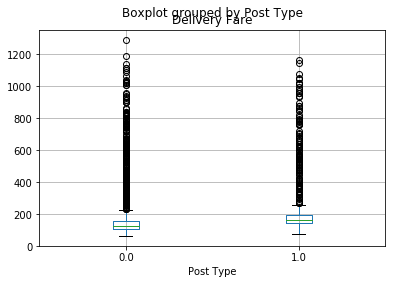

In [588]:
df.boxplot(column = 'Delivery Fare', by = 'Post Type')

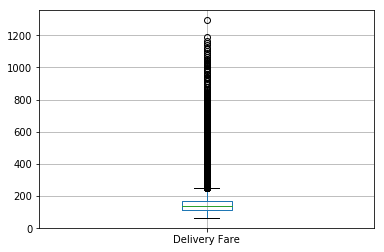

In [589]:
# Several Outliers.
df.boxplot(column = 'Delivery Fare')

Creating Linear model to calculate fare. First creating a dataframe where categorical variables are converted into dummy columns.

In [590]:
# Creates dummy columns for categorical variables
df1 = pd.get_dummies(df,columns=['Drone Type', 'Post Type', 'Dep Type'], drop_first=True)
df1.head()

,Id,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Drone Type_2.0,Drone Type_3.0,Post Type_1.0,Dep Type_day,Dep Type_night
0,ID1916644910,29.364,6.0,26.0,-37.721629,142.923370,-37.159802,147.755539,431.590,2018-07-27,08:05:23,437.84,15:23:13,103.44,0,0,0,1,0
1,ID1737873632,22.000,1.0,3.0,-38.768748,145.975063,-37.815917,147.967342,203.825,2018-05-15,07:20:48,210.07,10:50:52,94.17,0,0,0,1,0
2,ID1144893592,35.219,27.0,10.0,-37.128423,143.298559,-38.060572,145.721902,237.588,2018-02-17,21:09:51,204.86,00:34:42,151.30,1,0,0,0,1
3,ID1188085757,48.075,17.0,20.0,-36.912743,145.210805,-37.641696,145.061909,82.210,2018-02-26,07:08:33,71.81,08:20:21,151.55,0,1,0,1,0
4,ID1657230014,39.616,4.0,28.0,-37.177231,148.335859,-37.386122,146.489867,165.144,2018-06-08,23:05:59,171.39,01:57:22,121.23,0,0,0,0,1


In [591]:
# Removing fare outliers and nulls
df2 = df1[(df1['Delivery Fare'].isna() == False) &(df1['Delivery Fare'] < 250) ]
X = df2.iloc[:,[1,8,14,15,16,17,18]].values
y = df2.iloc[:, 13].values

In [592]:
# Creating linear regression model. Gives good r squared.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
regressor.score(X_train, y_train)

0.9799524152424468

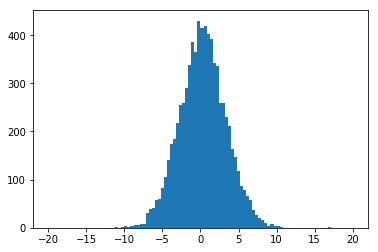

In [593]:
# Histogram of residuals looks good. Some large errors are there. Could be errors in the outiers which are mostly errors.
plt.hist(y_pred-y_test, bins = 100, range = (-20,20))
plt.show()

In [594]:
df1.head()

,Id,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Drone Type_2.0,Drone Type_3.0,Post Type_1.0,Dep Type_day,Dep Type_night
0,ID1916644910,29.364,6.0,26.0,-37.721629,142.923370,-37.159802,147.755539,431.590,2018-07-27,08:05:23,437.84,15:23:13,103.44,0,0,0,1,0
1,ID1737873632,22.000,1.0,3.0,-38.768748,145.975063,-37.815917,147.967342,203.825,2018-05-15,07:20:48,210.07,10:50:52,94.17,0,0,0,1,0
2,ID1144893592,35.219,27.0,10.0,-37.128423,143.298559,-38.060572,145.721902,237.588,2018-02-17,21:09:51,204.86,00:34:42,151.30,1,0,0,0,1
3,ID1188085757,48.075,17.0,20.0,-36.912743,145.210805,-37.641696,145.061909,82.210,2018-02-26,07:08:33,71.81,08:20:21,151.55,0,1,0,1,0
4,ID1657230014,39.616,4.0,28.0,-37.177231,148.335859,-37.386122,146.489867,165.144,2018-06-08,23:05:59,171.39,01:57:22,121.23,0,0,0,0,1


In [595]:
# Imputing fare in df1
df1['Delivery Fare'][df1['Delivery Fare'].isnull()] = regressor.predict(df1[df1['Delivery Fare'].isnull()].iloc[:,[1,8,14,15,16,17,18]])

C:\Users\Swaraj Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [596]:
# *** Imputing fare values in df (coverage error).
df['Delivery Fare'] = df1['Delivery Fare']

In [597]:
# Creating column of the calculated fare.
df1['Delivery Fare'][df1['Delivery Fare'].isnull()==False] = regressor.predict(df1[df1['Delivery Fare'].isnull()==False].iloc[:,[1,8,14,15,16,17,18]])
df['Calc Fare'] = df1['Delivery Fare']

C:\Users\Swaraj Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


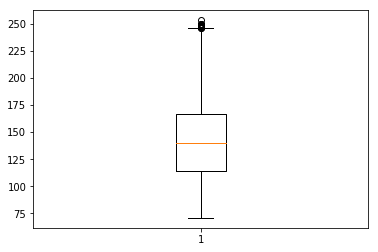

In [598]:
# The box plots show that some really high fares have been well fixed by the calculated column
plt.boxplot(df['Calc Fare'])
plt.show()

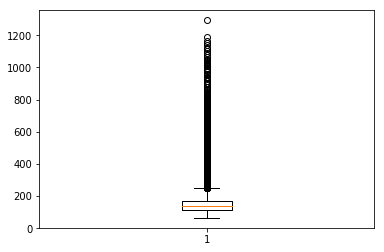

In [599]:
plt.boxplot(df['Delivery Fare'])
plt.show()

In [600]:
# Creating function to fix delivery fare based on calculated fare. Allowing error of 5.

def fare_fixer(row):
    if row['Calc Fare'] - row['Delivery Fare'] > 5:
        return row['Calc Fare']
    if row['Calc Fare'] - row['Delivery Fare'] < -5:
        return row['Calc Fare']
    else:
         return row['Delivery Fare']

#*** Fixing fare values in dataframe:
df['Delivery Fare'] = df.apply(lambda x: fare_fixer(x), axis = 1)

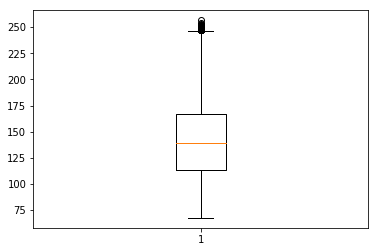

In [601]:
# Gives much better result. Values were probably wrong if error was around 900. Outliers are barely out of the whisker.
plt.boxplot(df['Delivery Fare'])
plt.show()

In [602]:
df.drop(columns = ['Calc Fare', 'Dep Type'], inplace = True)

In [603]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1916644910,1.0,0.0,29.364,6.0,26.0,-37.721629,142.923370,-37.159802,147.755539,431.590,2018-07-27,08:05:23,437.84,15:23:13,103.440000
1,ID1737873632,1.0,0.0,22.000,1.0,3.0,-38.768748,145.975063,-37.815917,147.967342,203.825,2018-05-15,07:20:48,210.07,10:50:52,88.063554
2,ID1144893592,2.0,0.0,35.219,27.0,10.0,-37.128423,143.298559,-38.060572,145.721902,237.588,2018-02-17,21:09:51,204.86,00:34:42,157.011251
3,ID1188085757,3.0,0.0,48.075,17.0,20.0,-36.912743,145.210805,-37.641696,145.061909,82.210,2018-02-26,07:08:33,71.81,08:20:21,151.550000
4,ID1657230014,1.0,0.0,39.616,4.0,28.0,-37.177231,148.335859,-37.386122,146.489867,165.144,2018-06-08,23:05:59,171.39,01:57:22,115.634687


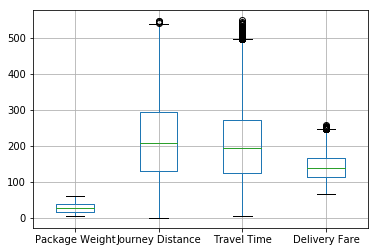

In [604]:
# Outliers are not so bad. Probably contains accurate useful data.
df.boxplot(column = ['Package Weight', 'Journey Distance', 'Travel Time', 'Delivery Fare'])

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38765 entries, 0 to 38797
Data columns (total 16 columns):
Id                       38741 non-null object
Drone Type               38765 non-null float64
Post Type                38765 non-null float64
Package Weight           38765 non-null float64
Origin Region            38765 non-null float64
Destination Region       38765 non-null float64
Origin Latitude          38765 non-null float64
Origin Longitude         38765 non-null float64
Destination Latitude     38765 non-null float64
Destination Longitude    38765 non-null float64
Journey Distance         38765 non-null float64
Departure Date           38765 non-null object
Departure Time           38765 non-null object
Travel Time              38765 non-null float64
Delivery Time            38765 non-null object
Delivery Fare            38765 non-null float64
dtypes: float64(12), object(4)
memory usage: 6.3+ MB


In [613]:
df.to_csv('29286174_solution.csv', index=False)